In [55]:
import numpy as np
import pylab as pl
import statsmodels.api  as sm
import statsmodels.formula.api as smf
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
def line(x, pars, err=False):
    '''
    Function that created a line given an independent variable and parameters 
    Arguments:
    x: series of IV values
    pars: series of 2 numbers : slope and intercept
    Return:
     array of DV values
    '''
    if err:
        err = np.random.randn(len(x)) * err
    else:
        err = np.zeros_like(x)
    return pars[0] * x + pars[1] + err, err

In [62]:
x = np.arange(-10,10,3)
x

array([-10,  -7,  -4,  -1,   2,   5,   8])

In [63]:
np.random.seed(123)
y_model, e = line(x, (0.4, 2.))

In [64]:
y, e = line(x, (0.4, 2.), err=1.3)

<Container object of 3 artists>

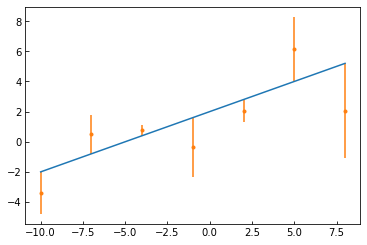

In [65]:
pl.plot(x, y_model, '-')
pl.errorbar(x, y, yerr=e, fmt='.')

In [ ]:
x2d = sm.add_constant(x)
lres = sm.OLS(y, x2d).fit()
xfit = sm.add_constant(np.arange(-10,10,0.1))

In [75]:
lres.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     7.379
Date:                Thu, 13 Oct 2016   Prob (F-statistic):             0.0420
Time:                        19:33:06   Log-Likelihood:                -13.656
No. Observations:                   7   AIC:                             31.31
Df Residuals:                       5   BIC:                             31.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4496      0.772      1.878      0.119        -0.534     3.433
x1             0.3446      0.127      2.716      0.042         0.019     0.671
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.522
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.517
Skew:                           0.396   Prob(JB):                        0.772
Kurtosis:                       1.930   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

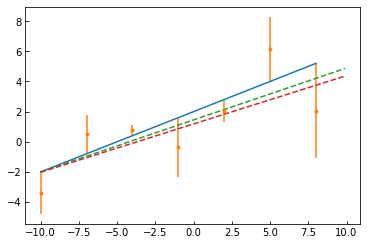

In [69]:
wres = sm.WLS(y, x2d, weights=(np.abs(e))).fit()
pl.plot(x, y_model, '-')
pl.errorbar(x, y, yerr=e, fmt='.')
pl.plot(np.arange(-10,10,0.1), lres.predict(xfit), '--')
pl.plot(np.arange(-10,10,0.1), wres.predict(xfit), '--')


In [70]:
xyd = pd.DataFrame()
xyd['X'] = x
xyd['y'] = y
xyd['X2'] = x*x

cres = smf.ols(formula = 'y ~ X2 + X', data=xyd).fit()

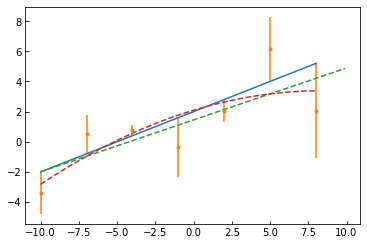

In [74]:
pl.plot(x, y_model, '-')
pl.errorbar(x, y, yerr=e, fmt='.')
pl.plot(np.arange(-10,10,0.1), lres.predict(xfit), '--')

xyd2 = pd.DataFrame()
xyd2['X'] = np.linspace(x.min(), x.max(), 100)
xyd2['X2'] = xyd2['X'] * xyd2['X']
pl.plot(xyd2['X'], cres.predict(xyd2), '--')
